<a href="https://colab.research.google.com/github/sdesuzane/data_science-Alura/blob/tmdb-analysis/TMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")

# Explorando o dataset

In [2]:
tmdb.info() # tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [3]:
print(f"Linhas: {tmdb.shape[0]}, Colunas: {tmdb.shape[1]}") # verificando quantas linhas e colunas tem

Linhas: 4803, Colunas: 20


In [4]:
tmdb["original_title"].nunique() # valores unicos

4801

In [5]:
tmdb.isnull().sum() # valores nulos na coluna

,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


# Análise básica

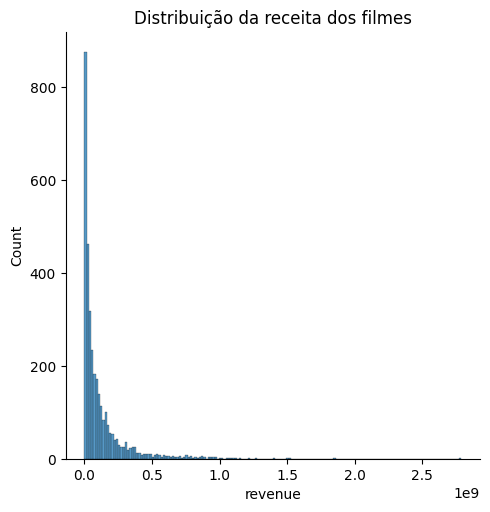

In [6]:
# verificando a distribuição dos valores
com_faturamento = tmdb.query('revenue > 0')
sns.displot(com_faturamento["revenue"]) # 1e9 ta na casa do bilão, poucos chegaram na casa do bilhão de faturamento
plt.title("Distribuição da receita dos filmes")
plt.show()

In [7]:
# maior receita
max_faturamento = tmdb.loc[tmdb["revenue"].idxmax()]
print(max_faturamento[['title', 'revenue']])

title          Avatar
revenue    2787965087
Name: 0, dtype: object


In [8]:
# maior orçamento
max_orcamento = tmdb.loc[tmdb["budget"].idxmax()]
print(max_orcamento[['title', 'budget']])

title     Pirates of the Caribbean: On Stranger Tides
budget                                      380000000
Name: 17, dtype: object


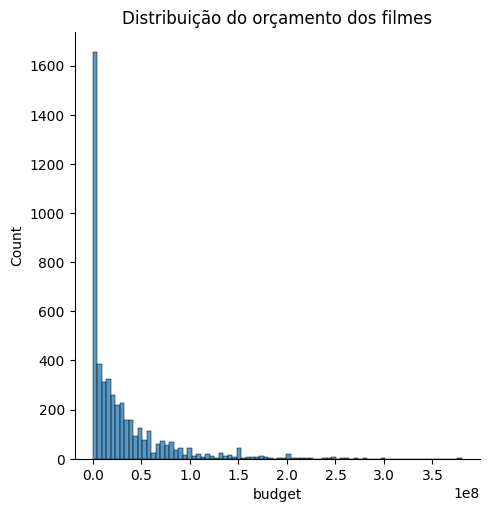

In [9]:
# verificando a distribuição dos orçamentos
com_orcamento = tmdb.query("budget > 0")
sns.displot(tmdb["budget"])
plt.title("Distribuição do orçamento dos filmes")
plt.show()

In [10]:
# verificando o genero mais comum
from collections import Counter

genero = tmdb['genres'].dropna().str.split('|').sum()
mais_comum = Counter(genero).most_common(5)
print(mais_comum)

[('[{"id": 18, "name": "Drama"}]', 370), ('[{"id": 35, "name": "Comedy"}]', 282), ('[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]', 164), ('[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]', 144), ('[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]', 142)]


# Tendencias temporais

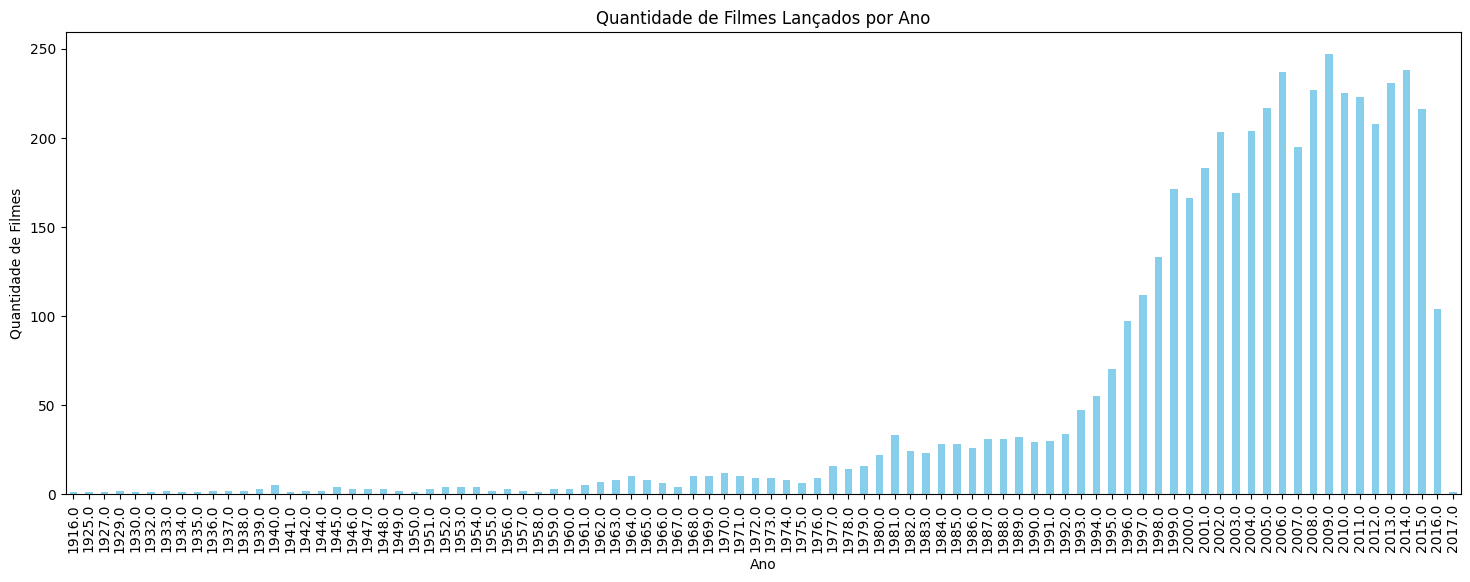

In [19]:
# quantidade de filmes lancados por ano

# extraindo o ano da coluna release_date
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'], errors='coerce')
tmdb['release_year'] = tmdb['release_date'].dt.year

# contando os filmes por ano
filmes_por_ano = tmdb.groupby('release_year').size()

filmes_por_ano.plot(kind='bar', figsize=(18, 6), color='skyblue')
plt.title('Quantidade de Filmes Lançados por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Filmes')
plt.show()


In [20]:
tmdb["original_language"].unique() # linguas unicas

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [14]:
tmdb["original_language"].value_counts().head() # moda: lingua mais usada


,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27


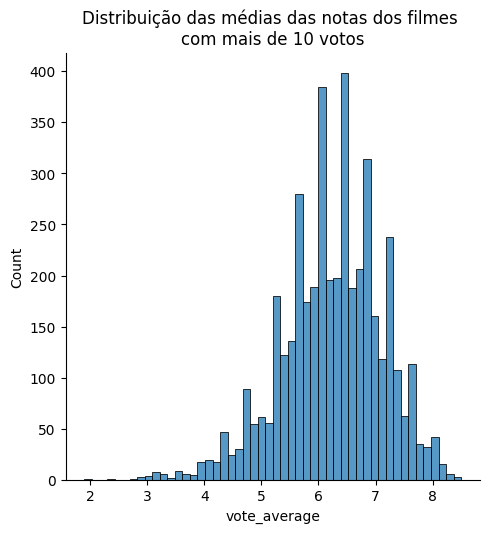

In [15]:
mais_10_votos = tmdb.query("vote_count > 10")
sns.displot(mais_10_votos["vote_average"])
plt.title("Distribuição das médias das notas dos filmes \ncom mais de 10 votos")
plt.show()

In [ ]:
# lingua => categorica sem ordem...


# budget (orcamento) => quantitativa contínua, ela tem valores continuos finito dentro do que pode ter => media, mediana
# notas do movielens => categorica, 0.5, 1, 1.5 ..., nao tem 2.5 => moda, mediana
# quantidade de votos => 1,2,3,4,5 ... nao existe 2.5 votos => quando a variavel nao é continua, nao faz sentido dizer 2.5... nesses casos pode dizer que é a mediana (metade dos filmes teve tal, e a outra metade teve tal, nesse caso seria 3) => mediana, moda

In [ ]:
# variaveis:
# qualitativas (categoricas) => nomianais e ordinais
# quantitativas (numericas) => discretas e contínuas